![](https://www.dii.uchile.cl/wp-content/uploads/2021/06/Magi%CC%81ster-en-Ciencia-de-Datos.png)


# Proyecto: Riesgo en el Banco Giturra

### **MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

#### Cuerpo Docente:

- Profesor: Gabriel Iturra, Ignacio Meza De La Jara
- Auxiliar: Sebastián Tinoco
- Ayudante: Arturo Lazcano, Angelo Muñoz

#### Integrantes:

- Nicolás Becerra Pinto
- Simón Sanfeliú Álvarez

### 1. Introducción

>En un mercado financiero cada vez más desafiante, la gestión del riesgo crediticio se convierte en un pilar fundamental para la sostenibilidad y el crecimiento de las instituciones financieras. Ante este escenario, **Giturra**, un visionario banquero, se ha propuesto redefinir los estándares de evaluación de riesgos en el sector.

>Con el objetivo de establecer un enfoque más equitativo y seguro para otorgar préstamos, **Giturra** ha reconocido la necesidad imperante de desarrollar una estrategia basada en datos y análisis de riesgo. Su visión es transformar su institución financiera en un modelo de préstamos más justo y responsable, alejándose de las tasas de interés usureras que han empañado su reputación.

>Este proyecto surge de la necesidad de optimizar la toma de decisiones crediticias mediante la implementación de modelos predictivos de riesgo. Para ello, se cuenta con un conjunto amplio y diverso de variables financieras, incluyendo historiales crediticios, ingresos y otros factores relevantes que caracterizan a los clientes potenciales.

>Un elemento clave en esta iniciativa es la interpretabilidad de los modelos desarrollados. **Giturra** reconoce la importancia de comprender cómo se toman las decisiones crediticias, no solo para el equipo técnico, sino también para los líderes y el personal no técnico. Esto se logrará mediante visualizaciones claras y explicaciones detalladas que identifiquen las características más relevantes, permitiendo así una evaluación coherente y fundamentada en el negocio.

>El objetivo final de este proyecto es claro: mejorar la calidad de los préstamos otorgados, reduciendo los riesgos de incumplimiento de pago y ofreciendo condiciones más favorables a aquellos clientes con menor probabilidad de impago. **Giturra** busca, a través de la ciencia de datos y el análisis de riesgo, no solo asegurar la viabilidad financiera de su banco, sino también restablecer la confianza y el prestigio en su institución.

>Este proyecto representa un paso adelante hacia una gestión crediticia más transparente, ética y basada en evidencia, allanando el camino hacia un sector financiero más equitativo y sustentable.

### 2. Preparación de Datos

In [3]:
# Cargamos el dataset
import pandas as pd 
df = pd.read_parquet('dataset.pq')
df.head()

,customer_id,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,...,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,CUS_0xd40,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,...,4.0,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,0
1,CUS_0x21b1,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,...,2.0,605.03,32.933856,27.0,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,0
2,CUS_0x2dbc,34.0,Engineer,143162.64,12187.220000,1,5,8,3.0,8,...,3.0,1303.01,38.374753,18.0,No,246.992319,10000.000000,High_spent_Small_value_payments,895.494583,0
3,CUS_0xb891,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,-100.0,4,...,4.0,632.46,27.332515,17.0,No,16.415452,125.617251,High_spent_Small_value_payments,379.216381,0
4,CUS_0x1cdb,21.0,Developer,35547.71,2853.309167,7,5,5,-100.0,1,...,4.0,943.86,25.862922,31.0,Yes,0.000000,181.330901,High_spent_Small_value_payments,364.000016,0


In [4]:
# Creando un dataset sin los ID
data = df.copy()
data = df.drop(columns="customer_id")
data

,age,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,num_credit_card,interest_rate,num_of_loan,delay_from_due_date,num_of_delayed_payment,...,num_credit_inquiries,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
0,23.0,Scientist,19114.12,1824.843333,3,4,3,4.0,3,6.0,...,4.0,809.98,23.933795,NaN,No,49.574949,24.785217,High_spent_Medium_value_payments,358.124168,0
1,28.0,Teacher,34847.84,3037.986667,2,4,6,1.0,3,4.0,...,2.0,605.03,32.933856,27.0,No,18.816215,218.904344,Low_spent_Small_value_payments,356.078109,0
2,34.0,Engineer,143162.64,12187.220000,1,5,8,3.0,8,6.0,...,3.0,1303.01,38.374753,18.0,No,246.992319,10000.000000,High_spent_Small_value_payments,895.494583,0
3,55.0,Entrepreneur,30689.89,2612.490833,2,5,4,-100.0,4,9.0,...,4.0,632.46,27.332515,17.0,No,16.415452,125.617251,High_spent_Small_value_payments,379.216381,0
4,21.0,Developer,35547.71,2853.309167,7,5,5,-100.0,1,15.0,...,4.0,943.86,25.862922,31.0,Yes,0.000000,181.330901,High_spent_Small_value_payments,364.000016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12495,19.0,Lawyer,42903.79,3468.315833,0,4,6,1.0,9,NaN,...,1.0,1079.48,35.716618,28.0,No,34.975457,115.184984,High_spent_Medium_value_payments,NaN,0
12496,45.0,Media_Manager,16680.35,NaN,1,1,5,4.0,1,0.0,...,8.0,897.16,41.212367,NaN,No,41.113561,70.805550,Low_spent_Large_value_payments,NaN,0
12497,50.0,Writer,37188.10,3097.008333,1,4,5,3.0,7,9.0,...,3.0,620.64,39.300980,30.0,No,84.205949,42.935566,High_spent_Medium_value_payments,NaN,0
12498,29.0,Architect,20002.88,1929.906667,10,8,29,5.0,33,25.0,...,9.0,3571.70,37.140784,6.0,Yes,60.964772,34.662906,High_spent_Large_value_payments,NaN,0


Explorando el dataset, notamos que existen valores en las variables categóricas que no corresponden a ninguna categoría. Por ejemplo, en la variable `occupation`, existe el valor `______`. Por ende, se reemplazaron estos valores por valores más amigables e intuitivos para el usuario. Por ejemplo, en el caso de `occupation`, se reemplazó `______` por `unknown`.

In [5]:
# Arreglando datos categóricos
data.occupation = data.occupation.apply(lambda x: 'No_known_occupation' if x == '_______' else x)
data.payment_of_min_amount = data.payment_of_min_amount.apply(lambda x: 'No' if x == 'NM' else x)
data.payment_behaviour = data.payment_behaviour.apply(lambda x: 'No_known_behaviour' if x == '!@9#%8' else x)

#### 2.1 Preprocesamiento con `ColumnTransformer`

In [6]:
def outlier_thresholds(df, col_name, low_quantile=0.25, up_quantile=0.75):
    '''
    Calcula los límites de los cuartiles para una variable.
    
    Parameters
    ----------
    df: dataframe
        El dataframe que se va a usar.
    col_name: str
        El nombre de la columna que se va a usar.
    low_quantile: float
        El cuantil inferior. Por defecto es primer cuartil.
    up_quantile: float
        El cuantil superior. Por defecto es tercer cuartil.
    
    Returns
    -------
    float
        El límite inferior.
    float
        El límite superior.
    '''
    Q1=df[col_name].quantile(low_quantile)
    Q3=df[col_name].quantile(up_quantile)
    IQR=Q3-Q1
    low_limit=Q1-1.5*IQR
    up_limit=Q3+1.5*IQR
    return low_limit, up_limit
    
def replace_with_thresholds(dataframe):
    '''
    Reemplaza los valores atípicos con los límites de los cuartiles.

    Parameters
    ----------
    dataframe: dataframe
        El dataframe que se va a usar.

    Returns
    -------
    dataframe
        El dataframe con los valores atípicos reemplazados.    
    '''
    for variable in dataframe.columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = dataframe[variable].median()
        dataframe.loc[(dataframe[variable] > up_limit), variable] = dataframe[variable].median()

    return dataframe

##### 2.1.1 Pipeline para variables numéricas y categóricas

In [7]:
from sklearn.preprocessing import FunctionTransformer, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separando los datos en numéricos y categóricos
num_cols = data.corr(numeric_only=True).columns.to_list()
cat_cols = [col for col in data.columns if not col in num_cols]
num_cols.remove("credit_score")

# Atributos numéricos
num_pipe = Pipeline([
                ('Outlier scaler', FunctionTransformer(replace_with_thresholds)),
                ('Standard scaler', StandardScaler())
            ])
# Atributos categóricos
cat_pipe = Pipeline([
    ('Encoder', OrdinalEncoder())
])

# Creando ColumnTransformer
ctrans = ColumnTransformer(
        transformers=[
            ("Categorico", cat_pipe, cat_cols),
            ("Numerico", num_pipe, num_cols),
        ]
)
ctrans.set_output(transform='pandas')

ColumnTransformer(transformers=[('Categorico',
                                 Pipeline(steps=[('Encoder',
                                                  OrdinalEncoder())]),
                                 ['occupation', 'payment_of_min_amount',
                                  'payment_behaviour']),
                                ('Numerico',
                                 Pipeline(steps=[('Outlier scaler',
                                                  FunctionTransformer(func=<function replace_with_thresholds at 0x0000017A4F592020>)),
                                                 ('Standard scaler',
                                                  StandardScaler())]),
                                 ['age', 'annual_income',
                                  'monthly_inhand_salary', 'num_bank_accounts',
                                  'num_credit_card', 'interest_rate',
                                  'num_of_loan', 'delay_from_due_date',
                                  'num_of_delayed_payment',
                                  'changed_credit_limit',
                                  'num_credit_inquiries', 'outstanding_debt',
                                  'credit_utilization_ratio',
                                  'credit_history_age', 'total_emi_per_month',
                                  'amount_invested_monthly',
                                  'monthly_balance'])])

##### 2.1.2 Graficar la distribución de las variables numéricas

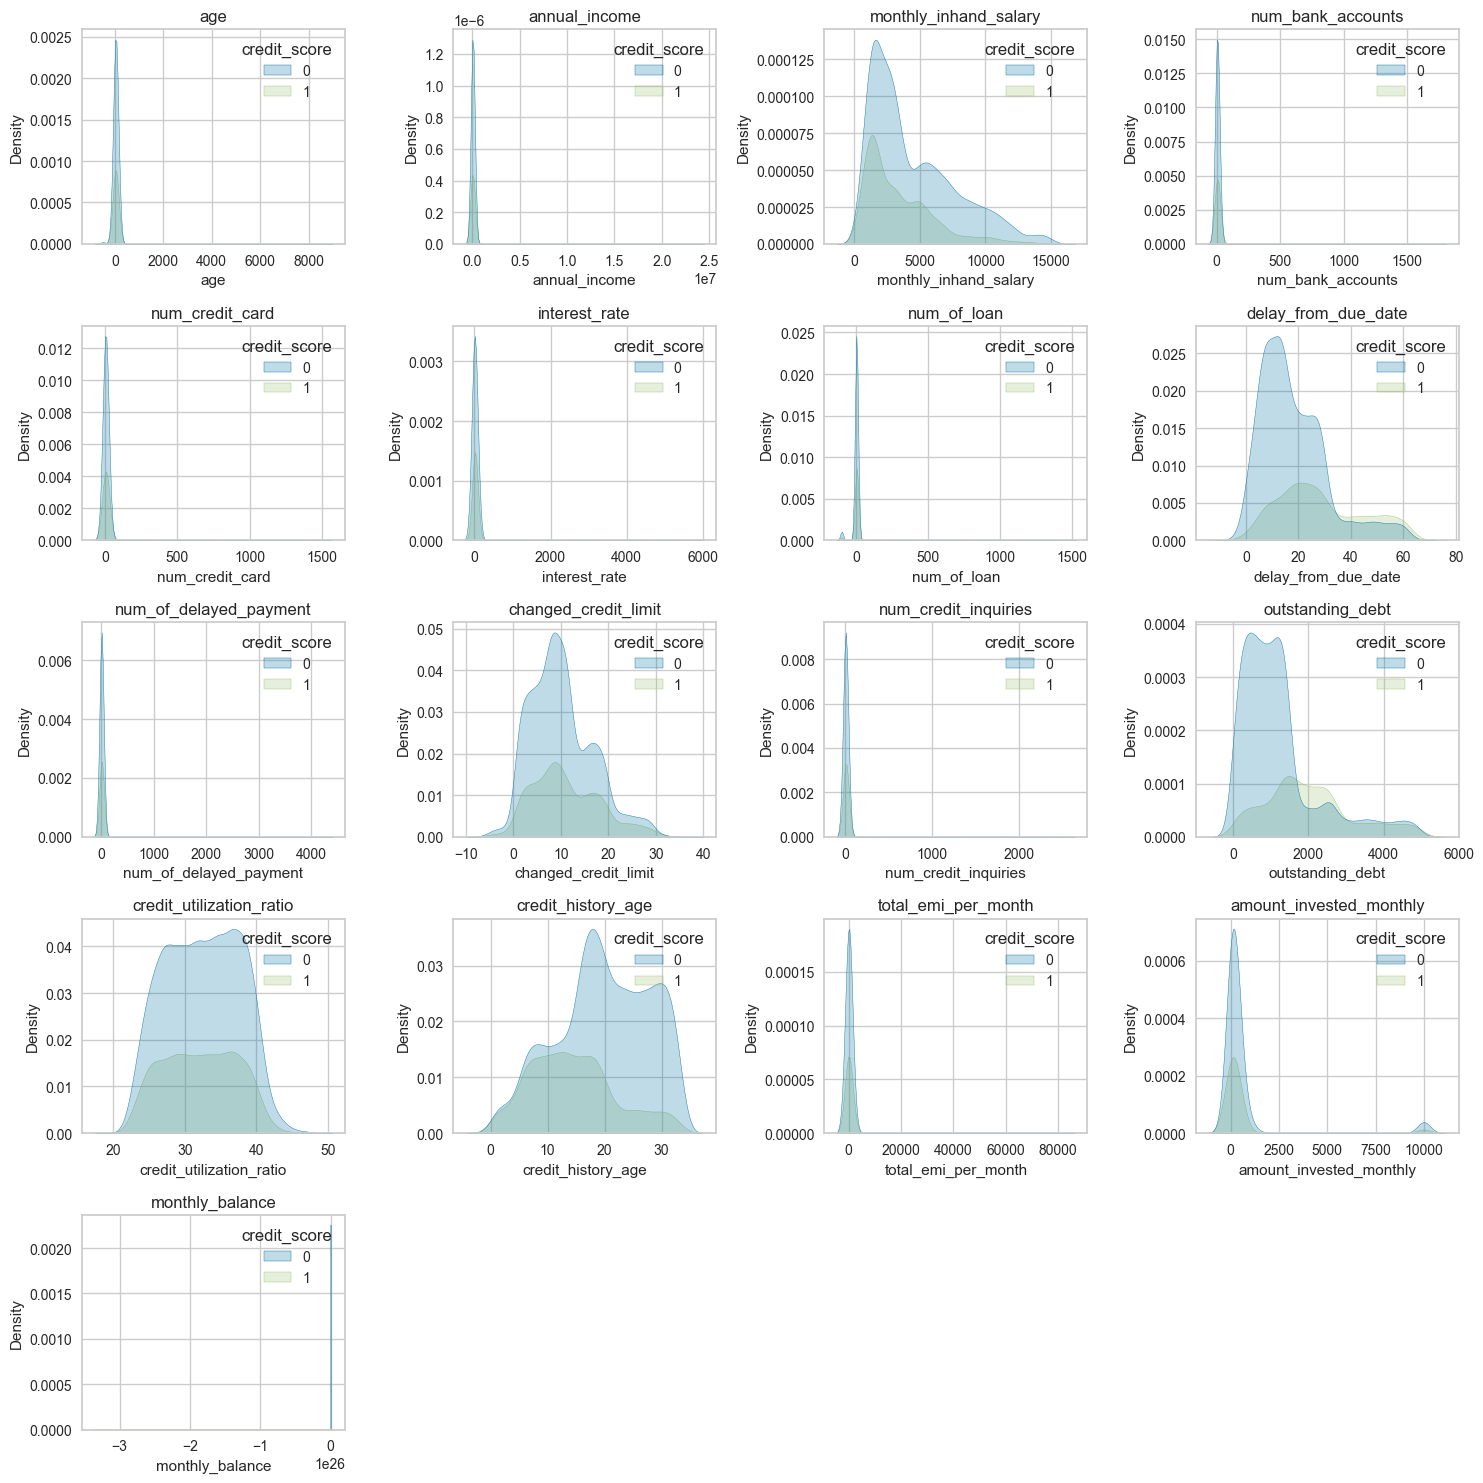

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
for ax, col in enumerate(num_cols):
    plt.subplot(5,4, ax+1)
    plt.title(col)
    sns.kdeplot(x=data[col],fill=True, hue=data["credit_score"], warn_singular=False)

plt.tight_layout()

##### 2.1.3 Graficar la distribución de las variables numéricas reemplazando outliers-

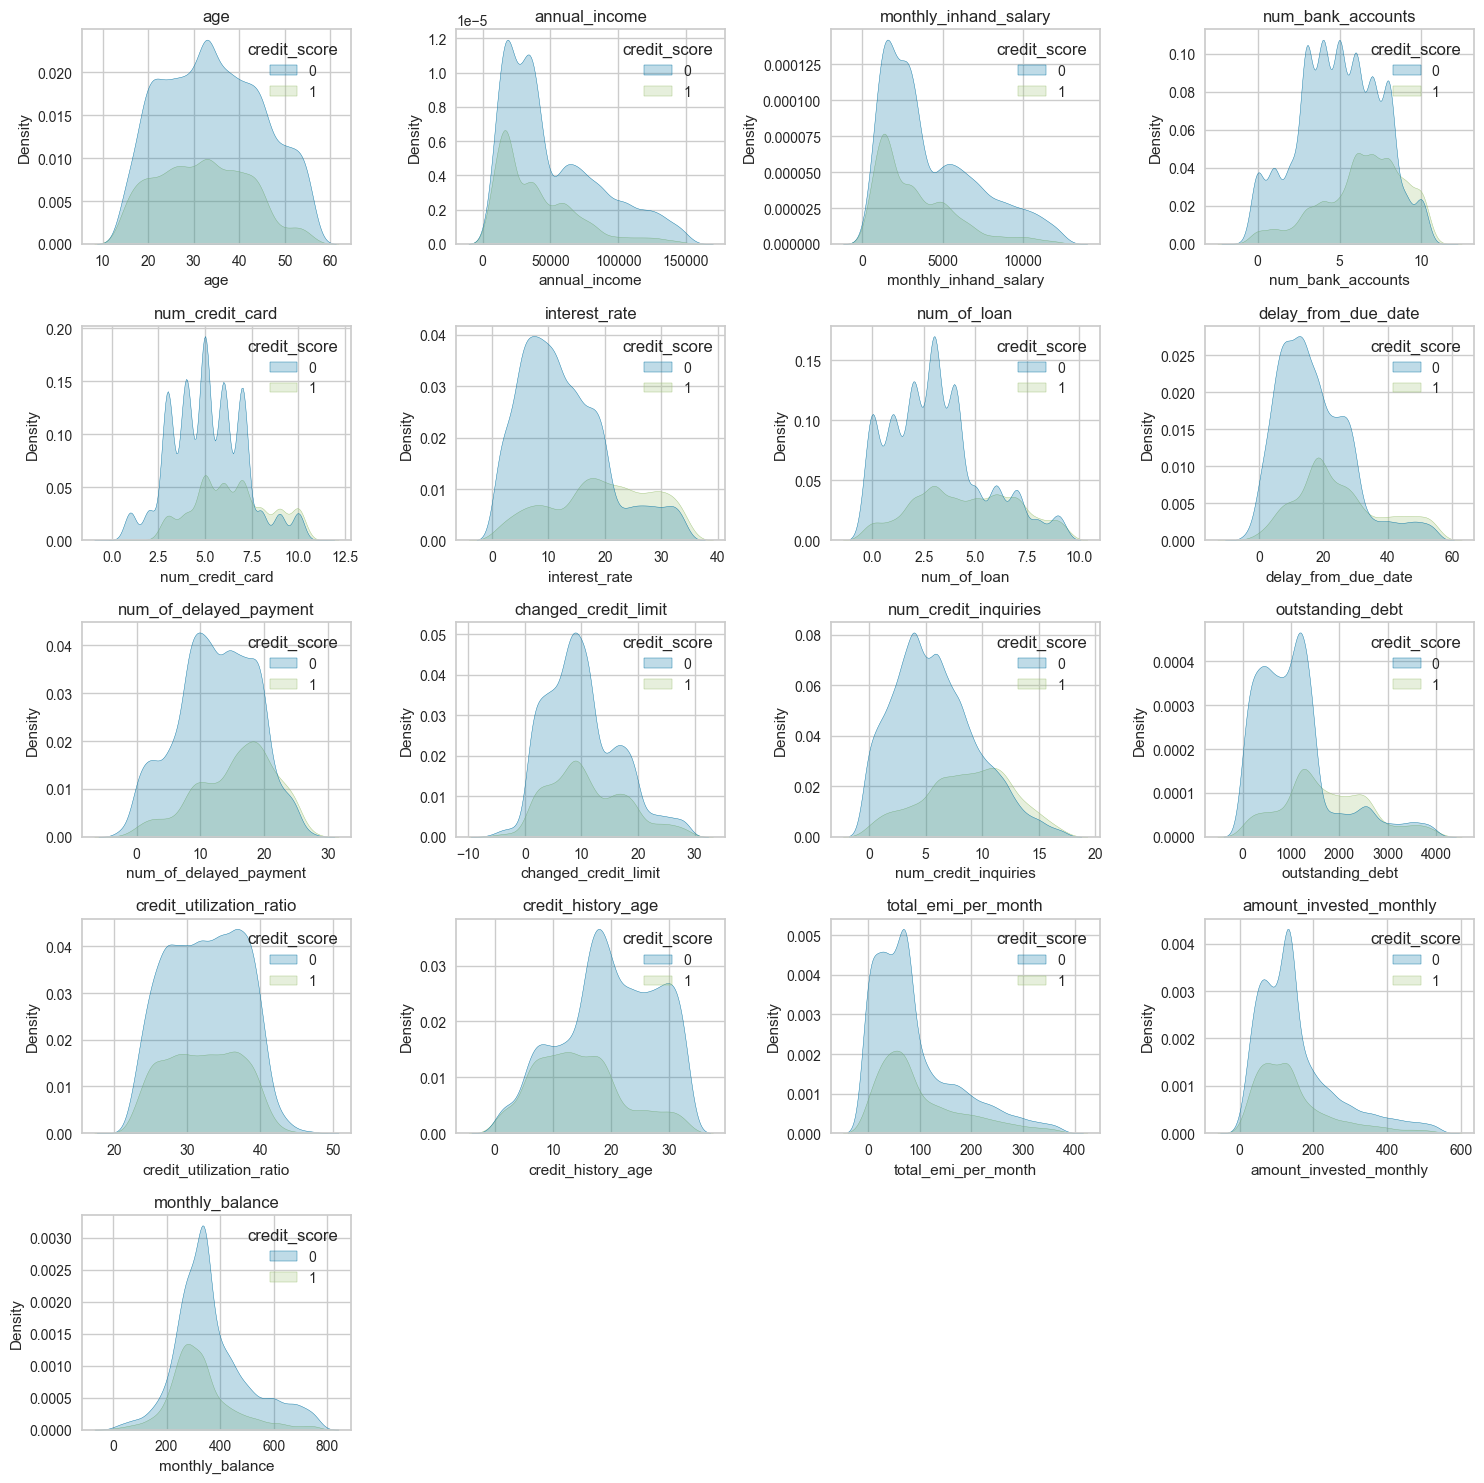

In [9]:
data_copy = data.copy()
data_copy = replace_with_thresholds(data_copy[num_cols])
plt.figure(figsize=(15,15))
for ax, col in enumerate(num_cols):
    plt.subplot(5,4, ax+1)
    plt.title(col)
    sns.kdeplot(x=data_copy[col],fill=True, hue=data["credit_score"], warn_singular=False)

plt.tight_layout()

##### 2.1.4 Graficar la distribución de las variables categóricas luego de aplicar `ColumnTransformer`

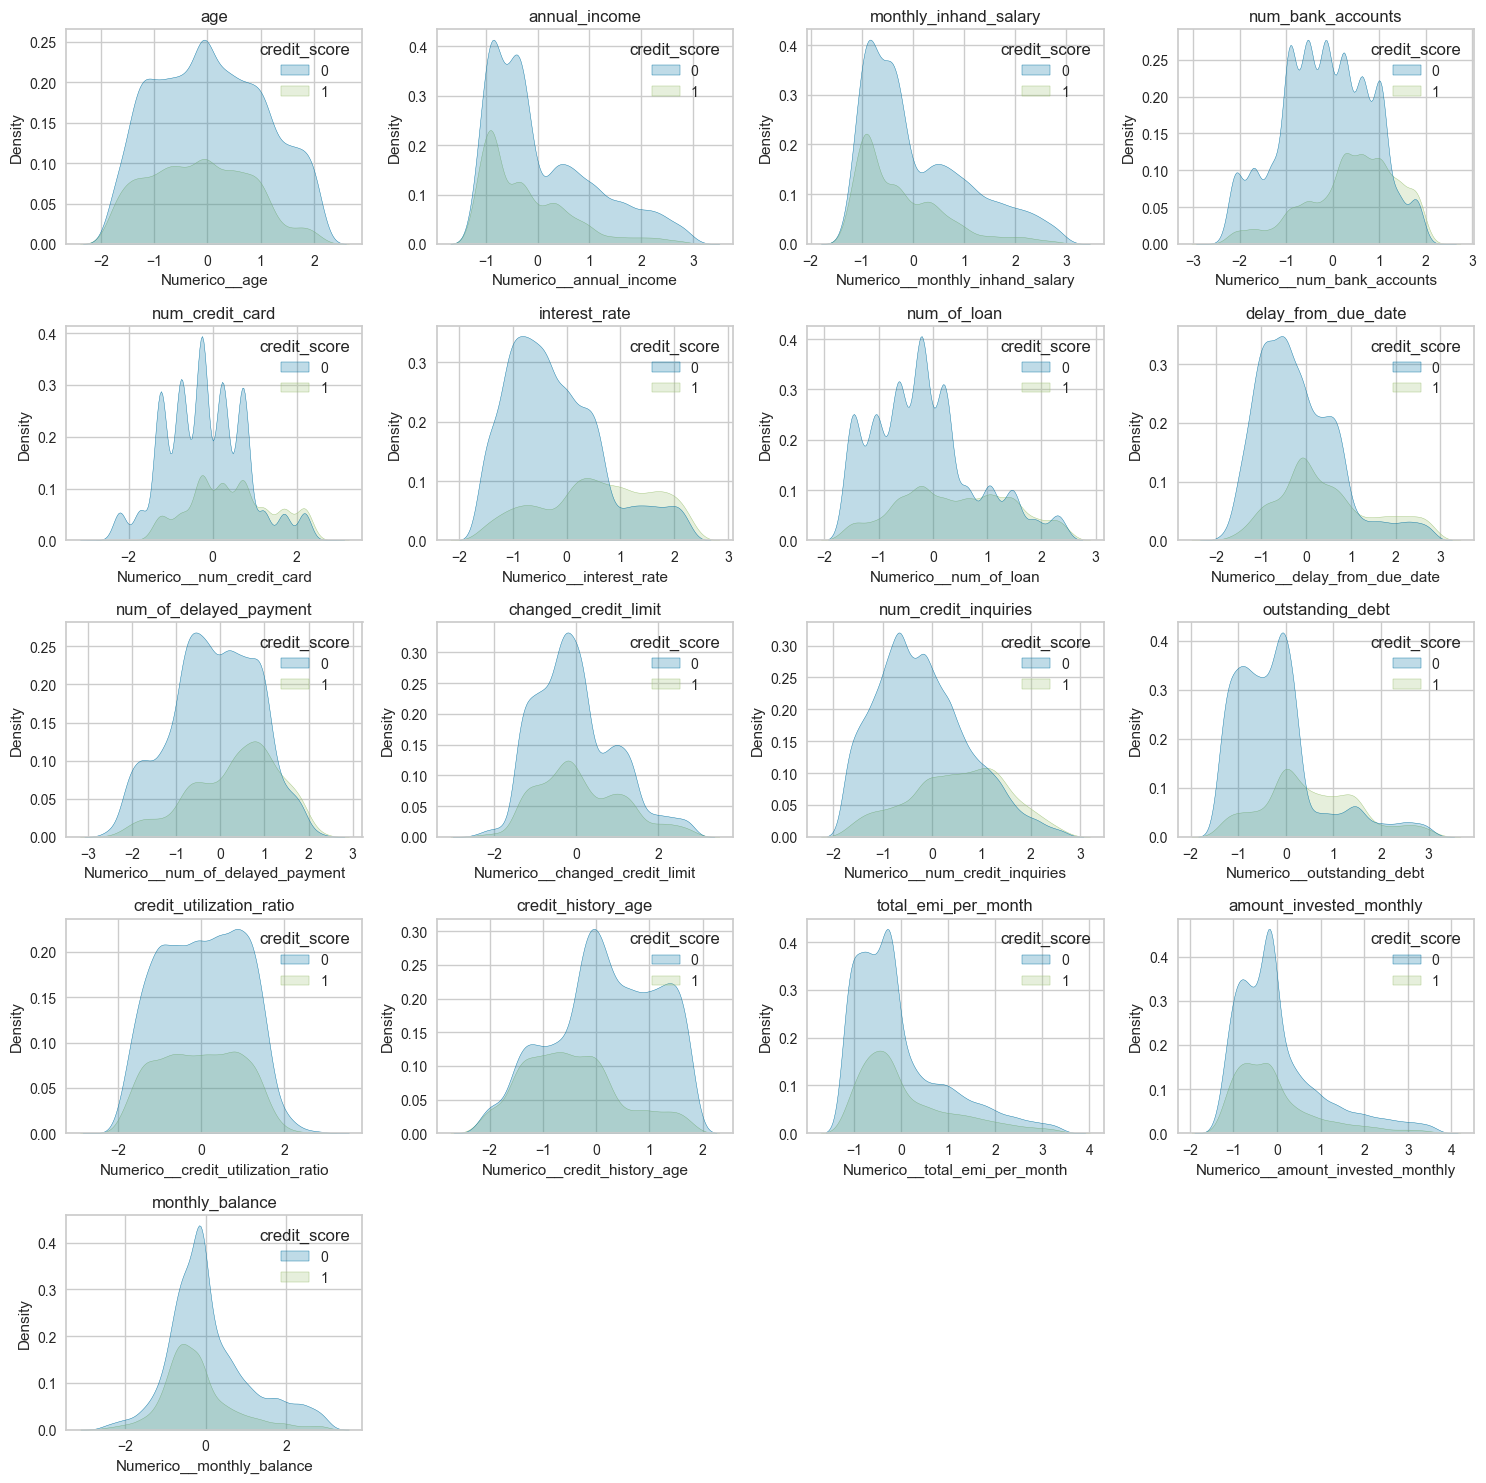

In [10]:
# Probando
test_data = ctrans.fit_transform(data)
test_data

plt.figure(figsize=(15,15))
for ax, col in enumerate(num_cols):
    plt.subplot(5,4, ax+1)
    plt.title(col)
    sns.kdeplot(x=test_data[f'Numerico__{col}'],fill=True, hue=data["credit_score"], warn_singular=False)
plt.tight_layout()

#### 2.2 Holdout 

In [11]:
from sklearn.model_selection import train_test_split

# Definiendo la semilla
RANDOM_STATE = 42

# Separación de características y target
X = data.drop(columns="credit_score")
y = data["credit_score"]

# Separando el conjunto de datos (70 / 20 / 10)
X_train, X_rest, y_train, y_rest = train_test_split(X, y, test_size=.3, random_state=RANDOM_STATE, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_rest, y_rest, test_size=.33, random_state=RANDOM_STATE)

#### 2.3 Datos nulos

POR QUÉ LOS IMPUTMOS POR LA MEDIANA?

Cantidad de filas sin valores nulos: 7986 (64.0%) 

age                            0
occupation                     0
annual_income                  0
monthly_inhand_salary       1916
num_bank_accounts              0
num_credit_card                0
interest_rate                  0
num_of_loan                    0
delay_from_due_date            0
num_of_delayed_payment       840
changed_credit_limit         254
num_credit_inquiries         257
outstanding_debt               0
credit_utilization_ratio       0
credit_history_age          1120
payment_of_min_amount          0
total_emi_per_month            0
amount_invested_monthly      586
payment_behaviour              0
monthly_balance              355
credit_score                   0
dtype: int64


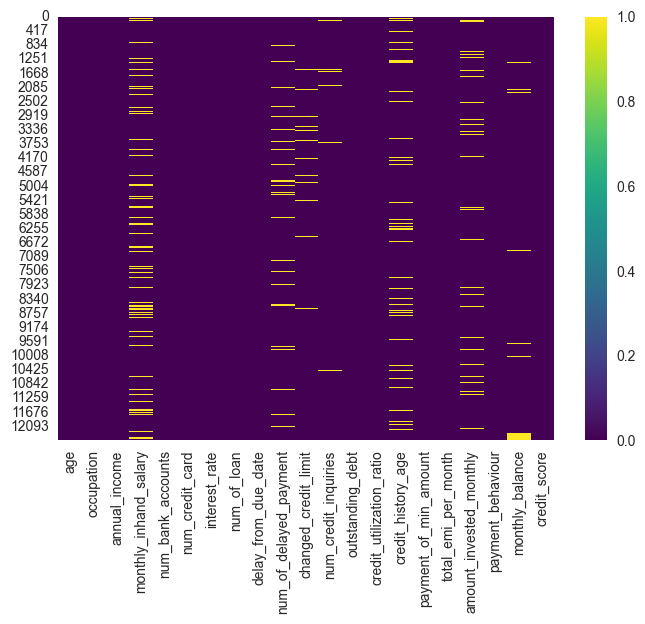

In [12]:
# Graficando la distribución de los nan
import seaborn as sns
data_dropna = data.copy().dropna()
print(f"Cantidad de filas sin valores nulos: {data_dropna.shape[0]} ({round(data_dropna.shape[0]/data.shape[0],2)*100}%) \n")
sns.heatmap(pd.isnull(data), cmap="viridis")
print(data.isnull().sum())

#### 2.4 Feature Engineering [Bonus]

### 3. Baseline

In [13]:
%%capture
!pip install -qq xgboost lightgbm

In [14]:
# Importando clasificadores
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer

# Clasificadores a probar
classifiers = [
    ("Dummy", DummyClassifier(strategy='stratified')),
    ("Regression", LogisticRegression()),
    ("KNN", KNeighborsClassifier()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("SVM", SVC()),
    ("Random Forest", RandomForestClassifier()),
    ("LightGBM", LGBMClassifier()),
    ("XGBoost", XGBClassifier())
]

# Ciclo para probar todos los clasificadores
results = {"Classifier": [], "Macro Average F1-Score": []}
for name, clf in classifiers:
    # Pipeline
    pipe = Pipeline([
        ("Scaling", ctrans),
        ("Imputer", SimpleImputer(strategy="median")),
        ("Classifier", clf)
    ])

    # Entrenamiento
    model = pipe.fit(X_train, y_train)

    # Predicción en validación
    pred = model.predict(X_val)

    print("----------------")
    print("Resultados para clasificador: ", name)
    print(classification_report(y_val, pred))
    print("----------------\n\n")

    # Guardando las métricas por clasificador
    results["Classifier"].append(name)
    results["Macro Average F1-Score"].append(round(classification_report(y_val, pred, output_dict=True)["macro avg"]["f1-score"], 2))

----------------
Resultados para clasificador:  Dummy
              precision    recall  f1-score   support

           0       0.71      0.71      0.71      1782
           1       0.29      0.29      0.29       730

    accuracy                           0.59      2512
   macro avg       0.50      0.50      0.50      2512
weighted avg       0.59      0.59      0.59      2512

----------------


----------------
Resultados para clasificador:  Regression
              precision    recall  f1-score   support

           0       0.79      0.89      0.84      1782
           1       0.61      0.42      0.50       730

    accuracy                           0.75      2512
   macro avg       0.70      0.66      0.67      2512
weighted avg       0.74      0.75      0.74      2512

----------------


----------------
Resultados para clasificador:  KNN
              precision    recall  f1-score   support

           0       0.79      0.88      0.83      1782
           1       0.60      0.44 

In [15]:
results_df = pd.DataFrame.from_dict(results)
results_df.sort_values(by="Macro Average F1-Score", ascending=False, inplace=True)
results_df.reset_index(drop=True)

,Classifier,Macro Average F1-Score
0,Random Forest,0.72
1,LightGBM,0.71
2,SVM,0.69
3,XGBoost,0.69
4,Regression,0.67
5,KNN,0.67
6,Decision Tree,0.62
7,Dummy,0.50


AGREGAR EXPLICACIONES

### 4. Optimización del Modelo

#### 4.1 Optimización de hiperparámetros

##### 4.1.1 Optimización de hiperparámetros Optuna RF

In [42]:
# Creando la optimización con Optuna
def objective_RF(trial):
    """
    Función objetivo para optimizar los hiperparámetros del modelo. Utiliza la libreria Optuna.

    Parameters
    ----------
    trial : optuna.trial._trial.Trial
        Objeto de la clase Trial de Optuna.

    Returns
    -------
    mae_opt : float
        Error absoluto medio del modelo optimizado. Es el valor que se intenta minimizar.
    """
    # Agregando valores a probar
    strategy = trial.suggest_categorical("strategy", ["mean", "median", "most_frequent", "constant"])
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    criterion = trial.suggest_categorical("criterion", ['gini', 'entropy', 'log_loss'])

    # Pipeline
    opt_pipe = Pipeline([
        ("Scaling", ctrans),
        ("Imputer", SimpleImputer(strategy=strategy)),
        ("Classifier", RandomForestClassifier(
            n_estimators=n_estimators,
            criterion=criterion,
            random_state=RANDOM_STATE,
            n_jobs=-1
        ))
    ])

    # Entrenamiento
    model = opt_pipe.fit(X_train, y_train)

    # Predicción en validación
    pred = model.predict(X_val)

    # Obteniendo el Macro Average F1-Score
    macro_avg_f1 = classification_report(y_val, pred, output_dict=True)["macro avg"]["f1-score"]

    return macro_avg_f1

In [43]:
import optuna

# Seteando semilla de optuna
optuna_seed = 0
n_trials = 20

# Sampler
sampler = optuna.samplers.TPESampler(seed=optuna_seed)

# Generando el estudio de hiperparámetros
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective_RF, n_trials=n_trials)  # 5 min de entrenamiento

[I 2023-12-22 16:35:20,264] A new study created in memory with name: no-name-e0ab54a1-02ad-4e84-b970-06cee63b0d12
[I 2023-12-22 16:35:22,016] Trial 0 finished with value: 0.7185733086777616 and parameters: {'strategy': 'median', 'n_estimators': 269, 'criterion': 'log_loss'}. Best is trial 0 with value: 0.7185733086777616.
[I 2023-12-22 16:35:23,775] Trial 1 finished with value: 0.7075120192307692 and parameters: {'strategy': 'mean', 'n_estimators': 327, 'criterion': 'gini'}. Best is trial 0 with value: 0.7185733086777616.
[I 2023-12-22 16:35:26,074] Trial 2 finished with value: 0.7098289873382155 and parameters: {'strategy': 'constant', 'n_estimators': 492, 'criterion': 'gini'}. Best is trial 0 with value: 0.7185733086777616.
[I 2023-12-22 16:35:27,982] Trial 3 finished with value: 0.7139658817373103 and parameters: {'strategy': 'constant', 'n_estimators': 309, 'criterion': 'log_loss'}. Best is trial 0 with value: 0.7185733086777616.
[I 2023-12-22 16:35:30,159] Trial 4 finished with va

###### 4.1.1.1 Visualizaciones

In [44]:
# Obteniendo las herramientas gráficas
from optuna.visualization import plot_optimization_history, plot_parallel_coordinate, plot_param_importances, plot_slice, plot_contour

# Gráfico de historial de optimización
print("El mejor valor de Macro Average F1-Score es: ", study.best_value)
plot_optimization_history(study, target_name="Macro Average F1-Score")


El mejor valor de Macro Average F1-Score es:  0.7214201865891074


In [45]:
# Gráfico de coordenadas paralelas
plot_parallel_coordinate(study, target_name="Macro Average F1-Score")

In [46]:
# Gráfico de importancia de hiperparámetros
plot_param_importances(study, target_name="Macro Average F1-Score")

#### 4.1.2 Optimización de hiperparámetros Optuna LGBM

In [53]:
# Creando la optimización con Optuna
def objective_LGBM(trial):
    """
    Función objetivo para optimizar los hiperparámetros del modelo basado en Light . Utiliza la libreria Optuna.

    Parameters
    ----------
    trial : optuna.trial._trial.Trial
        Objeto de la clase Trial de Optuna.

    Returns
    -------
    mae_opt : float
        Error absoluto medio del modelo optimizado. Es el valor que se intenta minimizar.
    """
    # Agregando valores a probar
    strategy = trial.suggest_categorical("strategy", ["mean", "median", "most_frequent", "constant"])
    boosting_type = trial.suggest_categorical("boosting_type", ['gbdt', 'dart'])
    learning_rate = trial.suggest_float('learning_rate', 0.001, 0.01)
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    num_leaves = trial.suggest_int('n_leaves', 10, 100)

    # Pipeline
    opt_pipe = Pipeline([
        ("Scaling", ctrans),
        ("Imputer", SimpleImputer(strategy=strategy)),
        ("Classifier", LGBMClassifier(
            n_estimators=n_estimators,
            learning_rate=learning_rate,
            boosting_type=boosting_type,
            random_state=RANDOM_STATE,
            num_leaves=num_leaves,
            n_jobs=-1,
            verbose=-1,
        ))
    ])

    # Entrenamiento
    model = opt_pipe.fit(X_train, y_train)

    # Predicción en validación
    pred = model.predict(X_val)

    # Obteniendo el Macro Average F1-Score
    macro_avg_f1 = classification_report(y_val, pred, output_dict=True)["macro avg"]["f1-score"]

    return macro_avg_f1

In [54]:
# Sampler LGMB
samplerLGMB= optuna.samplers.TPESampler(seed=optuna_seed)

# Generando el estudio de hiperparámetros
studyLGMB = optuna.create_study(direction='maximize', sampler=samplerLGMB)
studyLGMB.optimize(objective_LGBM, n_trials=n_trials)  # 5 min de entrenamiento

[I 2023-12-22 16:44:30,719] A new study created in memory with name: no-name-297c78fe-689d-45b8-a453-478f2b747c3a
[I 2023-12-22 16:44:34,072] Trial 0 finished with value: 0.6938804925829637 and parameters: {'strategy': 'median', 'boosting_type': 'dart', 'learning_rate': 0.0049382849013642335, 'n_estimators': 457, 'n_leaves': 97}. Best is trial 0 with value: 0.6938804925829637.
[I 2023-12-22 16:44:34,496] Trial 1 finished with value: 0.41499767116907316 and parameters: {'strategy': 'median', 'boosting_type': 'gbdt', 'learning_rate': 0.0017841636973138664, 'n_estimators': 108, 'n_leaves': 85}. Best is trial 0 with value: 0.6938804925829637.
[I 2023-12-22 16:44:35,550] Trial 2 finished with value: 0.4706744758780669 and parameters: {'strategy': 'most_frequent', 'boosting_type': 'dart', 'learning_rate': 0.002064469832820399, 'n_estimators': 356, 'n_leaves': 23}. Best is trial 0 with value: 0.6938804925829637.
[I 2023-12-22 16:44:35,887] Trial 3 finished with value: 0.5622201885643843 and p

##### 4.1.2.1 Visualizaciones

In [55]:
# Gráfico de historial de optimización
print("El mejor valor de Macro Average F1-Score es: ", studyLGMB.best_value)
plot_optimization_history(studyLGMB, target_name="Macro Average F1-Score")

El mejor valor de Macro Average F1-Score es:  0.7106591772202451


In [56]:
# Gráfico de coordenadas paralelas
plot_parallel_coordinate(studyLGMB, target_name="Macro Average F1-Score")

In [57]:
# Gráfico de importancia de hiperparámetros
plot_param_importances(studyLGMB, target_name="Macro Average F1-Score")

#### 4.2 Imbalanced learn
Dado que se trata de un problema con desbalance, se busca implementar técnicas de balanceo de datos automático de la librería `imblearn`. Para esto, se implementa un pipeline que incluye el balanceo de datos y el modelo de clasificación. Se busca optimizar los hiperparámetros usando Optuna para compararlo en el modelamiento base.

##### 4.2.1 Random Under Sampling

In [58]:
# Balanceando el conjunto de datos
from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler

# Balanceando el conjunto de datos
randomoversampler = RandomOverSampler(random_state=RANDOM_STATE)
X_train_balanced, y_train_balanced = randomoversampler.fit_resample(X_train, y_train)
X_val_balanced, y_val_balanced = randomoversampler.fit_resample(X_val, y_val)
X_test_balanced, y_test_balanced = randomoversampler.fit_resample(X_test, y_test)

# Verificando el balanceo
print("Antes del balanceo: ") 
print(y_train.value_counts())
print("\nDespués del balanceo: ")
print(y_train_balanced.value_counts())

# Creando la optimización con Optuna

# Sampler
samplerROS = optuna.samplers.TPESampler(seed=optuna_seed)

# Creando la optimización con Optuna
def objective_RF_ROS(trial):
    """
    Función objetivo para optimizar los hiperparámetros del modelo. Utiliza la libreria Optuna.

    Parameters
    ----------
    trial : optuna.trial._trial.Trial
        Objeto de la clase Trial de Optuna.

    Returns
    -------
    mae_opt : float
        Error absoluto medio del modelo optimizado. Es el valor que se intenta minimizar.
    """
    # Agregando valores a probar
    strategy = trial.suggest_categorical("strategy", ["mean", "median", "most_frequent", "constant"])
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    criterion = trial.suggest_categorical("criterion", ['gini', 'entropy', 'log_loss'])
    # max_depth = trial.suggest_int('max_depth', 1, 10)

    # Pipeline
    opt_pipe = Pipeline([
        ("Scaling", ctrans),
        ("Imputer", SimpleImputer(strategy=strategy)),
        ("Classifier", RandomForestClassifier(
            n_estimators=n_estimators,
            criterion=criterion,
            random_state=RANDOM_STATE,
            n_jobs=-1
        ))
    ])

    # Entrenamiento
    model = opt_pipe.fit(X_train_balanced, y_train_balanced)

    # Predicción en validación
    pred = model.predict(X_val_balanced)

    # Obteniendo el Macro Average F1-Score
    macro_avg_f1 = classification_report(y_val_balanced, pred, output_dict=True)["macro avg"]["f1-score"]

    return macro_avg_f1

# Generando el estudio de hiperparámetros
studyROS = optuna.create_study(direction='maximize', sampler=samplerROS)
studyROS.optimize(objective_RF_ROS, n_trials=n_trials)  # 5 min de entrenamiento

[I 2023-12-22 16:44:55,274] A new study created in memory with name: no-name-2b489236-6973-4198-bed1-aa09f2d2db0a


Antes del balanceo: 
0    6229
1    2521
Name: credit_score, dtype: int64

Después del balanceo: 
1    6229
0    6229
Name: credit_score, dtype: int64


[I 2023-12-22 16:45:06,333] Trial 0 finished with value: 0.7332687010830732 and parameters: {'strategy': 'median', 'n_estimators': 269, 'criterion': 'log_loss'}. Best is trial 0 with value: 0.7332687010830732.
[I 2023-12-22 16:45:17,206] Trial 1 finished with value: 0.7231621643916433 and parameters: {'strategy': 'mean', 'n_estimators': 327, 'criterion': 'gini'}. Best is trial 0 with value: 0.7332687010830732.
[I 2023-12-22 16:45:33,532] Trial 2 finished with value: 0.7227666118303412 and parameters: {'strategy': 'constant', 'n_estimators': 492, 'criterion': 'gini'}. Best is trial 0 with value: 0.7332687010830732.
[I 2023-12-22 16:45:46,414] Trial 3 finished with value: 0.7323212944959591 and parameters: {'strategy': 'constant', 'n_estimators': 309, 'criterion': 'log_loss'}. Best is trial 0 with value: 0.7332687010830732.
[I 2023-12-22 16:46:00,845] Trial 4 finished with value: 0.7294318344993538 and parameters: {'strategy': 'constant', 'n_estimators': 345, 'criterion': 'entropy'}. Bes

###### 4.2.1.1 Visualizaciones

In [59]:
# Gráfico de historial de optimización
print("El mejor valor de Macro Average F1-Score es: ", studyROS.best_value)
plot_optimization_history(studyROS, target_name="Macro Average F1-Score")

El mejor valor de Macro Average F1-Score es:  0.7346018372478572


In [60]:
# Gráfico de coordenadas paralelas
plot_parallel_coordinate(studyROS, target_name="Macro Average F1-Score")

In [61]:
# Gráfico de importancia de hiperparámetros
plot_param_importances(studyROS, target_name="Macro Average F1-Score")

In [62]:
# Comprarmos los resultados de los dos estudios
print("El mejor valor de Macro Average F1-Score es: ", study.best_value)
print("El mejor valor de Macro Average F1-Score usando RandomOverSampler es: ", studyROS.best_value)

El mejor valor de Macro Average F1-Score es:  0.7214201865891074
El mejor valor de Macro Average F1-Score usando RandomOverSampler es:  0.7346018372478572


#### 4.3 PyCaret

In [ ]:
import pycaret
from pycaret.classification import *

s = setup(data = data, target = 'credit_score', session_id=42, log_experiment=True, experiment_name='credit_score')


ImportError: MlflowLogger requires mlflow. Install using `pip install mlflow`

### 5. Interpretabilidad 

### 6. Conclusiones

### 7. Bonus: Implementación de Kedro y FastAPI